<a href="https://colab.research.google.com/github/fisherj1/Neural/blob/task5_1/Lesson5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

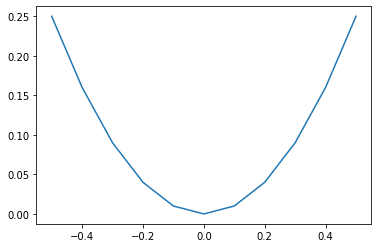

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

def calculate(x):
    return x * x

x = np.asarray(list(range(-10, 11, 2)))/20
y = calculate(x)

plt.plot(x, y)
plt.show()

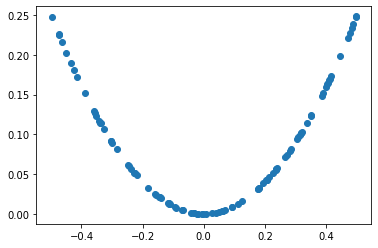

In [3]:
from numpy.random import rand
 
# generate randoms sample from x^2
def generate_real_samples(n=100):
    # generate random inputs in [-0.5, 0.5]
    x = rand(n) - 0.5
    y = calculate(x)
    # stack arrays
    x = x.reshape(n, 1)
    y = y.reshape(n, 1)
    return np.hstack((x, y))
 
data = generate_real_samples()
plt.scatter(data[:, 0], data[:, 1])
plt.show()

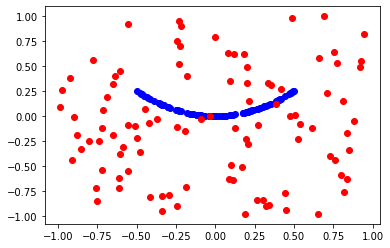

In [4]:
# generate n fake samples
def generate_fake_samples(n=100):
    # generate inputs in [-1, 1]
    x = -1 + rand(n) * 2
    y = -1 + rand(n) * 2
    # stack arrays
    x = x.reshape(n, 1)
    y = y.reshape(n, 1)
    return np.hstack((x, y))

fake = generate_fake_samples()
plt.scatter(data[:, 0], data[:, 1], color='blue')
plt.scatter(fake[:, 0], fake[:, 1], color='red')
plt.show()

In [5]:
# define the discriminator model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


Shape of real data is (100, 2) and shape of fakes is (100, 2)
Resulting features shape (x_train) is (200, 2)
Answers input shape is (100,) and (100,) for real ones and fakes
Will merge them as well, but using other stacking as they have other shape structure


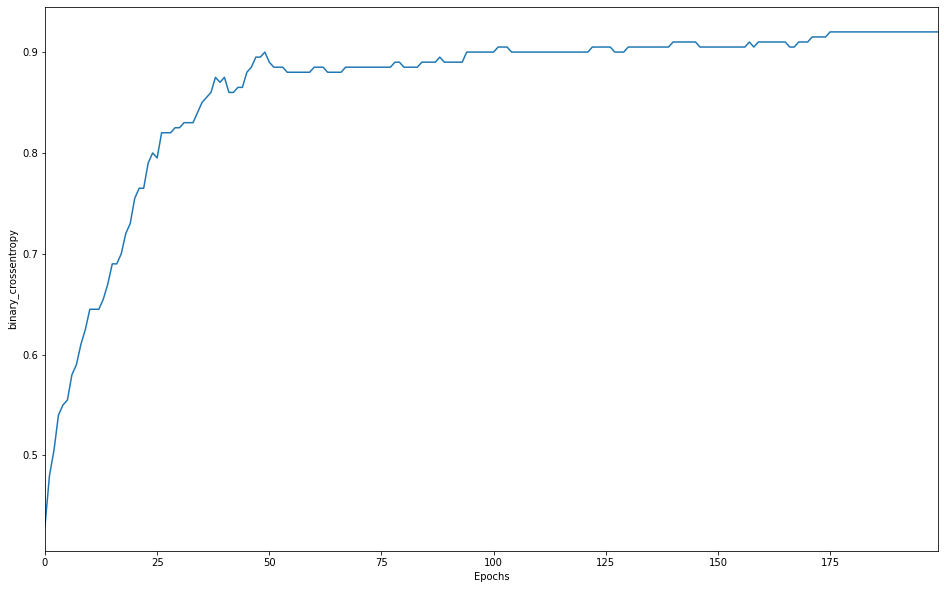

In [6]:
# Lets merge real objects and fakes
print("Shape of real data is {} and shape of fakes is {}".format(data.shape, fake.shape))
x_train = np.vstack((data, fake))
print("Resulting features shape (x_train) is {}".format(x_train.shape))
# Generate answers for our objects
data_y = np.ones(len(data))
fake_y = np.zeros(len(fake))
# Merge answers the same way as features
print("Answers input shape is {} and {} for real ones and fakes".format(data_y.shape, fake_y.shape))
print("Will merge them as well, but using other stacking as they have other shape structure")
y_train = np.hstack((data_y, fake_y))

history = model.fit(x_train, y_train, epochs = 200, verbose = 0)

plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("binary_crossentropy")
plt.plot(history.epoch, history.history["accuracy"])
plt.xlim([0,max(history.epoch)])
plt.show()

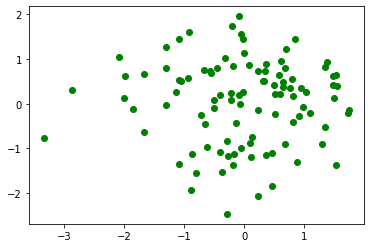

In [7]:
from numpy.random import randn

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

latent_example_2d = generate_latent_points(2, 100)
plt.scatter(latent_example_2d[:, 0], latent_example_2d[:, 1], color = "green")
plt.show()

In [47]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

generator_model = define_generator(5)
# summarize the model
generator_model.summary()

Model: "sequential_2634"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [9]:
# use the generator to generate n fake examples
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    return generator.predict(x_input)

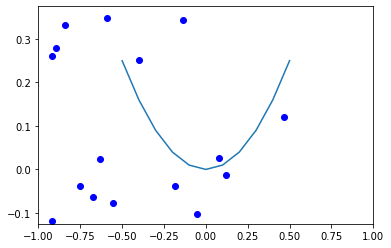

In [48]:
def summarize_performance(generator, latent_dim, n=100, savename = None):
    # prepare fake examples
    x_fake = generate_fake_samples(generator, latent_dim, n)
    # build model dependence
    x = np.asarray(list(range(-10, 11, 2)))/20
    y = calculate(x)
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    x_min = min(x) - 0.5 * (max(x) - min(x))
    x_max = max(x) + 0.5 * (max(x) - min(x))
    y_min = min(y) - 0.5 * (max(y) - min(y))
    y_max = max(y) + 0.5 * (max(y) - min(y))
    plt.ylim([y_min, y_max])
    plt.xlim([x_min, x_max])
    plt.plot(x, y)
    if savename is None:
        plt.show()
    else:
        plt.savefig(savename, format = "png")

summarize_performance(generator_model, 5)

In [53]:
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

gan_model = define_gan(generator_model, model)
# summarize gan model
gan_model.summary()
gan_model.save_weights("output/gan_initial.h5")

Model: "sequential_2636"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2634 (Sequential) (None, 2)                 122       
_________________________________________________________________
sequential (Sequential)      (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


In [60]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = np.ones((n_batch, 1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)

#gan_model.load_weights("output/gan_initial.h5")
train_gan(gan_model, 5, n_epochs = 10000)

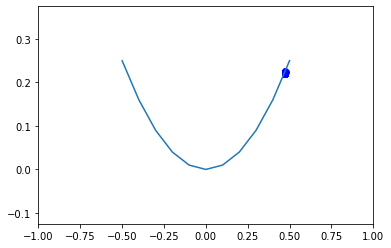

In [61]:
summarize_performance(generator_model, 5)

In [ ]:
train_gan(gan_model, latent_dim, n_epochs = 1)
        data = generate_real_samples(100)
        data_y = np.ones(len(data))
        x_gen = generate_fake_samples(g_model,latent_dim, 100)
        y_gen = np.zeros(len(gen_imgs))

        x_train = np.vstack((data, x_gen))
        y_train = np.hstack((data_y, y_gen))

In [39]:
generate_fake_samples(gan_model.get_layer("sequential_1"),5, 100)

array([[ 5.59768558e-01,  2.75485843e-01],
       [ 4.01419759e-01,  1.58362195e-01],
       [-2.22703576e-01,  5.72698079e-02],
       [-3.14962178e-01,  9.62549001e-02],
       [-1.80639476e-02, -4.29615378e-04],
       [ 3.96591499e-02, -4.23747674e-03],
       [ 3.44091445e-01,  1.28194973e-01],
       [ 1.86777756e-01,  2.65863203e-02],
       [ 2.87890524e-01,  8.49149078e-02],
       [ 4.07246023e-01,  1.76678181e-01],
       [-6.05763495e-02,  2.45202668e-02],
       [ 2.31863111e-01,  5.01770116e-02],
       [-1.83948308e-01,  3.61288823e-02],
       [-3.43377829e-01,  1.33128539e-01],
       [ 9.89521742e-02,  2.60549746e-02],
       [-5.23317456e-02,  2.71419808e-03],
       [-1.70473307e-02,  7.22583756e-03],
       [-4.44408894e-01,  1.92330539e-01],
       [ 4.91597444e-01,  2.35587835e-01],
       [ 2.54558235e-01,  3.63454111e-02],
       [ 3.30955416e-01,  1.13224715e-01],
       [ 2.03584924e-01,  7.87533820e-02],
       [-4.15579617e-01,  1.72091782e-01],
       [ 2.

In [62]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
    for i in range(n_epochs):
        data = generate_real_samples(100)
        data_y = np.ones(len(data))
        x_gen = generate_fake_samples(g_model, latent_dim, 100)
        y_gen = np.zeros(len(x_gen))

        x_train = np.vstack((data, x_gen))
        y_train = np.hstack((data_y, y_gen))
        
        history = d_model.fit(x_train, y_train, epochs = 1, verbose = 0)

        #gan_model = define_gan(gan_model.get_layer("sequential_1"), d_model)
        train_gan(gan_model, 5, n_epochs = 1)
       #x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
       # y_gan = np.ones((n_batch, 1))
        # update the generator via the discriminator's error
       # gan_model.train_on_batch(x_gan, y_gan)
        
gan_model.load_weights("output/gan_initial.h5")

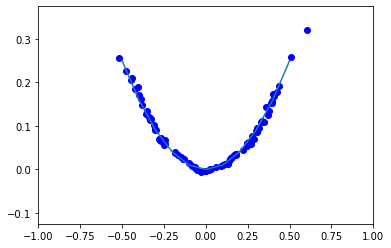

In [70]:
train(generator_model, model, gan_model, 5, n_epochs = 10000)
summarize_performance(generator_model, 5)

In [ ]:
from PIL import Image
import imageio

gan_model.load_weights("output/gan_initial.h5")
images = []
epochs_total = 20000
frames = 100
for i in range (1, frames):
    train(generator_model, model, gan_model, 5, n_epochs = int(epochs_total / frames))
    summarize_performance(generator_model, 5, savename = "output/tmp.png")
    plt.cla()
    image = Image.open("output/tmp.png")
    ar = np.asarray(image)
    images.append(ar)
kargs = { 'duration': 0.1 }
imageio.mimsave('output/gan_learning.gif', images, None, **kargs)
summarize_performance(generator_model, 5)